# Reading and Processing Audio Data

This document demonstrates how to read and process audio data. I will update this over time as I perform more processing of our data.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

plt.rcParams['figure.figsize'] = (10,6)

We can read in the audio data as amplitudes over time, along with the corresponding sampling rate. This file has one channel (mono), so it is easy to read and returns a one-dimensional array of data.

In [139]:
# set path and filename
path = 'sample_audio/'
filename = 'divinecomedy_longfellow_01.wav'

# fs - sampling frequency
# data - raw audio data as 1-d np array
fs, read = wavfile.read(path + filename)

# take a copy to prevent pointers to closed files
data = read.copy()

In [140]:
print(f'Sampling Frequency: {fs}\nData Length: {len(data)}')

Sampling Frequency: 22050
Data Length: 400000


In [141]:
# loading entire dataset can lag jupyter
# take a reasonable sample
subsample = len(data)
if subsample > 400000:
    subsample = 400000

# try multiplying fs by a constant for interesting results
Audio(data=data[:subsample], rate=fs)

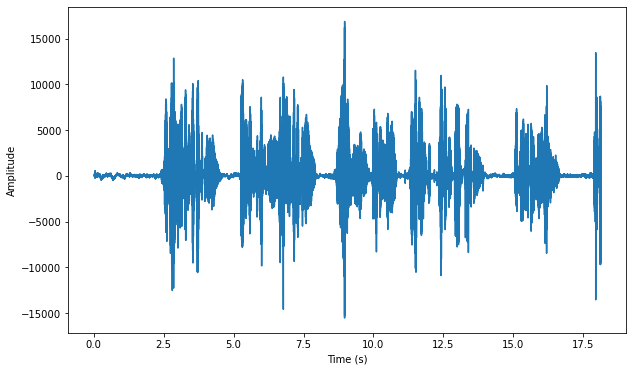

In [127]:
# plot data

fig = plt.figure()

plt.plot(
    np.array(list(range(subsample))) / fs, 
    data[:subsample]
)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)');

Now we generate a spectrogram. This converts the amplitude/time data into a frequency/time representation by using Fourier Transforms (maybe worth researching more).

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

https://en.wikipedia.org/wiki/Fourier_transform

In [128]:
# returns (frequencies, times, spectrogram)
freq, time, sxx = signal.spectrogram(data[:subsample], fs)

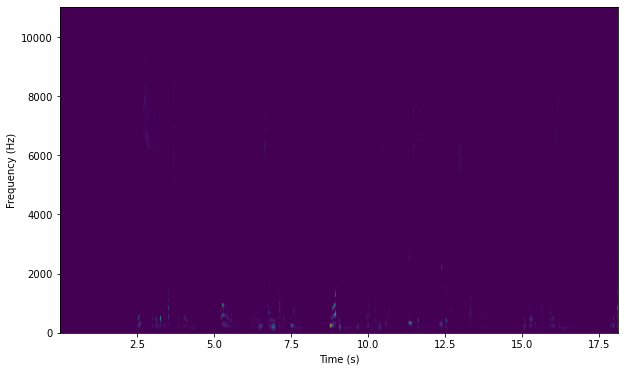

In [109]:
fig = plt.figure()
plt.pcolormesh(time, freq, sxx, shading='gouraud');
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)');

The next file has two channels (stereo). We can identify this by checking the shape of the data array, which is now two-dimensional with two columns.

In [144]:
path = 'sample_audio/'
filename = 'divinecomedy_longfellow_02.wav'

fs, read = wavfile.read(path + filename)
data = read.copy()
data.shape

(400000, 2)

In [145]:
subsample = len(data)
if subsample > 400000:
    subsample = 400000

Audio(data=data[:subsample,0], rate=fs)

In [132]:
Audio(data=data[:subsample,0], rate=fs)

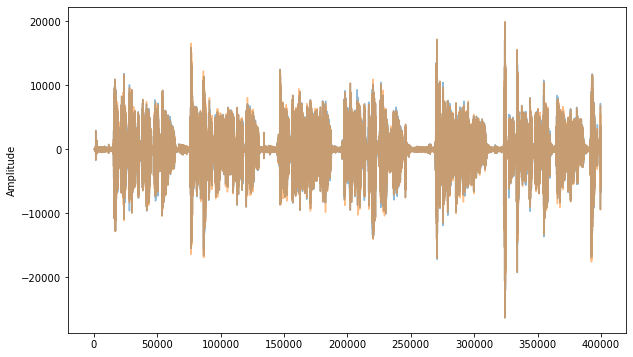

In [133]:
fig = plt.figure()
plt.ylabel('Amplitude')
plt.plot(data[:subsample], alpha=0.5);

It turns out that both channels are nearly identical in this case. This may not always be true, so it might be worth investigating techniques for combining channels. Since it is not an issue here, we can choose either channel arbitrarily.

In [134]:
freq, time, sxx = signal.spectrogram(data[:subsample,0], fs)

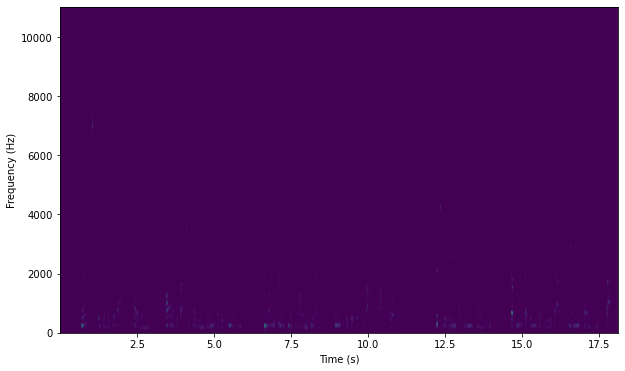

In [135]:
fig = plt.figure()
plt.pcolormesh(time, freq, sxx, shading='gouraud');
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)');